Fix the headers:
    
'Last chars'
'Fixing Title name'
'Pt1 Title name'
'Pt2 Title name'
'Title name test1'
'Title name'
'Raw Title'
'Len name1'
'Len name2'
'Title Trimmed?'
'Pre-Title Case Fix'
'Title Case Fix?'
'Fixing Title name'
'Function Fixed Text?'
'Title name test1'
'Ends with )'
'Parentheses Issue'

Author: Ty
Last Updated: 11/29/18

I am putting this code on hold. I am going to do more research and solve some new issues. I also want to change it from the
bracket format to the dot format. This will take take, but as a POC, this has done its job.

The purpose of this code is to fix/flag where there are problems with the titles and to produce
a summary with visuals of the results.

This is a modification of the long method. This uses For loops to make it easier
and more efficient.

This code has been modified to handle the "The", "A", and the "An" situations.
---------------
This is easy to fix, but I need to know if the client wants this or not.
A problem with the names is 'The Legend Of The Sword'
See how it capitalizes "Of", but you might want that if it is 
at the start.
'Of Truth And Death'. I can cut the fronts and ends to make this work.

Another case is single apostrophes, I can fix them. I just need to add the code for
each letter "'r ", this will fix ('r ing riders) , but watch out for (we're a going), so having
the extra space at the end of the letter is key.

An easy fix if the client wants for the Title case on inner words like:
a, an, the, by, of  is to select them individually.
For (A Star IS Born) text replace  " Is " with " is "
Just like 's, Part II, Part III


Currently this will fix one /, but if there are more, it will only flag it. The data has
as many as eight, so I am only going to flag more than one value for now.

I changed the names of the dataframes to this format 'dataforwardslash1_1' because if I have to do more work on /
then I want to make it easier to know what count and stage I am working on.
1_1 means, 1/ and stage 2 of the my process.


This is easy to do, but eventually I would need a list from the client of which terms to remove at the end in ().
The Washington DC Incident (pilot)
Wake Up the Gypsy in Me (colorized)
MadTV Goes to the Movies (Special)
ON THE NOGGIN' (30SEC)
The top 3 are easy. Just delete them and strip the title. But the hr/min/sec varies too much, so just flag it.
But I have already kind of done this with the end with a ')' flag.


There is a way to make the For loop shorter, 
but I have not figured out how to setup the nested loop using For and While together yet
------------

Update 11/21/18:
I noticed that I had to add a final strip blanks to my functions because 'Detective ,A' the problem is the space after Detective.
Visually you can't see it, but if you concat with a /, then the space shows up. This was an easy fix.

Added the: AKA flag

Added: Overrides to this case:
' is '
This is for: is, by, an, and, for, of, to, in, or, the, are, a, on, 

Added time tracker

I did not add a flag for titles ending in:
...Hr)
...Min
...Sec)
because they would get flagged by the ')' flag.

Add a extra spaces in string remover

Flag if trim fixed
Flag if Case fixed


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#This is so we can see how long the code takes to finish
start_time = time.time()

In [3]:
end_num_THE_list = [-5, -4]
bad_text_THE_list = [', The', ',The']

end_num_A_list = [-3, -2]
bad_text_A_list = [', A', ',A']

end_num_AN_list = [-4, -3]
bad_text_AN_list = [', An', ',An']

#commaSpaceFix_list= ['",A"," ,A"','",B"," ,B"','",C"," ,C"','",D"," ,D"','",E"," ,E"','",F"," ,F"','",G"," ,G"','",H"," ,H"','",I"," ,I"','",J"," ,J"','",K"," ,K"','",L"," ,L"','",M"," ,M"','",N"," ,N"','",O"," ,O"','",P"," ,P"','",Q"," ,Q"','",R"," ,R"','",S"," ,S"','",T"," ,T"','",U"," ,U"','",V"," ,V"','",W"," ,W"','",X"," ,X"','",Y"," ,Y"','",Z"," ,Z"']

In [4]:
#11/21/18
#Title case terms that I need to lower. But it has to be the whole sub-string.
title_case_list = [" Of "," The "," An "," And "," For "," Is "," To "," In "," Or "," By "," Are "," With "," On ","'A ","'B ","'C ","'D ","'E ","'F ","'G ","'H ","'I ","'J ","'K ","'L ","'M ","'N ","'O ","'P ","'Q ","'R ","'S ","'T ","'U ","'V ","'W ","'X ","'Y ","'Z "]

In [5]:
#This is my function.
#If the problem does not exist, it will keep the same value.
def Ty_text_work_THE():
    for end_num_THE_value in end_num_THE_list:
        data['Last chars']= data['Fixing Title name'].str[end_num_THE_value:]
        for bad_text_THE_value in bad_text_THE_list:
            data['Last_Chars_Prob?']= np.where(data['Last chars']==bad_text_THE_value,'Yes','No')
            data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', 'The '+data['Title name'],data['Title name'])
            data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', data['Fixing Title name'].str[:end_num_THE_value],data['Fixing Title name'])
            #Here Fix Title name1 gets cleaned
            data['Title name']= data['Fixing Title name']
            data['Title name']=data['Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [6]:
def Ty_text_work_A():
    for end_num_A_value in end_num_A_list:
        data['Last chars']= data['Fixing Title name'].str[end_num_A_value:]
        for bad_text_A_value in bad_text_A_list:
            data['Last_Chars_Prob?']= np.where(data['Last chars']==bad_text_A_value,'Yes','No')
            data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', 'A '+data['Title name'],data['Title name'])
            data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', data['Fixing Title name'].str[:end_num_A_value],data['Fixing Title name'])
            #Here Fix Title name1 gets cleaned
            data['Title name']= data['Fixing Title name']
            data['Title name']=data['Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [7]:
def Ty_text_work_AN():
    for end_num_AN_value in end_num_AN_list:
        data['Last chars']= data['Fixing Title name'].str[end_num_AN_value:]
        for bad_text_AN_value in bad_text_AN_list:
            data['Last_Chars_Prob?']= np.where(data['Last chars']==bad_text_AN_value,'Yes','No')
            data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', 'An '+data['Title name'],data['Title name'])
            data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', data['Fixing Title name'].str[:end_num_AN_value],data['Fixing Title name'])
            #Here Fix Title name1 gets cleaned
            data['Title name']= data['Fixing Title name']
            data['Title name']=data['Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [8]:
def Ty_text_work_forwardslashPt1_THE():
    for end_num_THE_value in end_num_THE_list:
        dataforwardslash1_1['Last chars']= dataforwardslash1_1['Pt1'].str[end_num_THE_value:]
        for bad_text_THE_value in bad_text_THE_list:
            dataforwardslash1_1['Last_Chars_Prob?']= np.where(dataforwardslash1_1['Last chars']==bad_text_THE_value,'Yes','No')
            dataforwardslash1_1['Pt1']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', 'The '+dataforwardslash1_1['Pt1'],dataforwardslash1_1['Pt1'])
            dataforwardslash1_1['Pt1']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', dataforwardslash1_1['Pt1'].str[:end_num_THE_value],dataforwardslash1_1['Pt1'])
            #Here Fix Title name1 gets cleaned
            dataforwardslash1_1['Pt1 Title name']= dataforwardslash1_1['Pt1']
            dataforwardslash1_1['Pt1 Title name']=dataforwardslash1_1['Pt1 Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [9]:
def Ty_text_work_forwardslashPt2_THE():
    for end_num_THE_value in end_num_THE_list:
        dataforwardslash1_1['Last chars']= dataforwardslash1_1['Pt2'].str[end_num_THE_value:]
        for bad_text_THE_value in bad_text_THE_list:
            dataforwardslash1_1['Last_Chars_Prob?']= np.where(dataforwardslash1_1['Last chars']==bad_text_THE_value,'Yes','No')
            dataforwardslash1_1['Pt2']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', 'The '+dataforwardslash1_1['Pt2'],dataforwardslash1_1['Pt2'])
            dataforwardslash1_1['Pt2']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', dataforwardslash1_1['Pt2'].str[:end_num_THE_value],dataforwardslash1_1['Pt2'])
            #Here Fix Title name1 gets cleaned
            dataforwardslash1_1['Pt2 Title name']= dataforwardslash1_1['Pt2']
            dataforwardslash1_1['Pt2 Title name']=dataforwardslash1_1['Pt2 Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [10]:
def Ty_text_work_forwardslashPt1_A():
    for end_num_A_value in end_num_A_list:
        dataforwardslash1_1['Last chars']= dataforwardslash1_1['Pt1'].str[end_num_A_value:]
        for bad_text_A_value in bad_text_A_list:
            dataforwardslash1_1['Last_Chars_Prob?']= np.where(dataforwardslash1_1['Last chars']==bad_text_A_value,'Yes','No')
            dataforwardslash1_1['Pt1']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', 'A '+dataforwardslash1_1['Pt1'],dataforwardslash1_1['Pt1'])
            dataforwardslash1_1['Pt1']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', dataforwardslash1_1['Pt1'].str[:end_num_A_value],dataforwardslash1_1['Pt1'])
            #Here Fix Title name1 gets cleaned
            dataforwardslash1_1['Pt1 Title name']= dataforwardslash1_1['Pt1']
            dataforwardslash1_1['Pt1 Title name']=dataforwardslash1_1['Pt1 Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [11]:
def Ty_text_work_forwardslashPt2_A():
    for end_num_A_value in end_num_A_list:
        dataforwardslash1_1['Last chars']= dataforwardslash1_1['Pt2'].str[end_num_A_value:]
        for bad_text_A_value in bad_text_A_list:
            dataforwardslash1_1['Last_Chars_Prob?']= np.where(dataforwardslash1_1['Last chars']==bad_text_A_value,'Yes','No')
            dataforwardslash1_1['Pt2']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', 'A '+dataforwardslash1_1['Pt2'],dataforwardslash1_1['Pt2'])
            dataforwardslash1_1['Pt2']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', dataforwardslash1_1['Pt2'].str[:end_num_A_value],dataforwardslash1_1['Pt2'])
            #Here Fix Title name1 gets cleaned
            dataforwardslash1_1['Pt2 Title name']= dataforwardslash1_1['Pt2']
            dataforwardslash1_1['Pt2 Title name']=dataforwardslash1_1['Pt2 Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [12]:
def Ty_text_work_forwardslashPt1_AN():
    for end_num_AN_value in end_num_AN_list:
        dataforwardslash1_1['Last chars']= dataforwardslash1_1['Pt1'].str[end_num_AN_value:]
        for bad_text_AN_value in bad_text_AN_list:
            dataforwardslash1_1['Last_Chars_Prob?']= np.where(dataforwardslash1_1['Last chars']==bad_text_AN_value,'Yes','No')
            dataforwardslash1_1['Pt1']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', 'An '+dataforwardslash1_1['Pt1'],dataforwardslash1_1['Pt1'])
            dataforwardslash1_1['Pt1']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', dataforwardslash1_1['Pt1'].str[:end_num_AN_value],dataforwardslash1_1['Pt1'])
            #Here Fix Title name1 gets cleaned
            dataforwardslash1_1['Pt1 Title name']= dataforwardslash1_1['Pt1']
            dataforwardslash1_1['Pt1 Title name']=dataforwardslash1_1['Pt1 Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [13]:
def Ty_text_work_forwardslashPt2_AN():
    for end_num_AN_value in end_num_AN_list:
        dataforwardslash1_1['Last chars']= dataforwardslash1_1['Pt2'].str[end_num_AN_value:]
        for bad_text_AN_value in bad_text_AN_list:
            dataforwardslash1_1['Last_Chars_Prob?']= np.where(dataforwardslash1_1['Last chars']==bad_text_AN_value,'Yes','No')
            dataforwardslash1_1['Pt2']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', 'An '+dataforwardslash1_1['Pt2'],dataforwardslash1_1['Pt2'])
            dataforwardslash1_1['Pt2']= np.where(dataforwardslash1_1['Last_Chars_Prob?']== 'Yes', dataforwardslash1_1['Pt2'].str[:end_num_AN_value],dataforwardslash1_1['Pt2'])
            #Here Fix Title name1 gets cleaned
            dataforwardslash1_1['Pt2 Title name']= dataforwardslash1_1['Pt2']
            dataforwardslash1_1['Pt2 Title name']=dataforwardslash1_1['Pt2 Title name'].str.strip()
            #The cleaned names get pasted into Title name. The next For value in the loop
            #Then we go back to the top and look at the Fix Title name1 again. Override Last chars in loop.

In [14]:
#11/21/18
#I need to create a function to fix Title Case terms
#I think bc of Nan: https://stackoverflow.com/questions/33692532/pandas-error-can-only-use-str-accessor-with-string-values
#the problem is the contains, it makes Nan issue.
def ty_title_to_lower_case():
    for title_case_value in title_case_list:
        data['Title name test1']= data['Title name'].str.contains(title_case_value)
        lower_title_case = title_case_value.lower()
        data['myNewtitle']= data['Title name'].str.replace(title_case_value,lower_title_case)
        data['Title name']= np.where(data['Title name test1']== True, data['myNewtitle'], data['Title name'])

In [15]:
#11/28/18
#def ty_commaSpaceFix():
#    for commaSpaceFix_value in commaSpaceFix_list:
#        #data['Title name']= data['Title name'].str.replace(commaSpaceFix_value)

## Here is where my code starts:

In [16]:
data = pd.read_csv("11.27.18 Theatrical Titles from ATOM.csv", usecols=['ID','Attributes.MPMNumber','Attributes.Title'],low_memory=False)
#Load the file
#We don't need all of the columns. Avoid memory problem.

In [17]:
#Create my ID column as an integer for the concat/vlookup later on
data['TyID'] = range(1, len(data) + 1)

In [18]:
data.head()
#Preview the data

,ID,Attributes.MPMNumber,Attributes.Title,TyID
0,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064",1
1,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,2
2,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,3
3,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370",4
4,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,5


In [19]:
data = data[['TyID','ID','Attributes.MPMNumber','Attributes.Title']]
#This rearranges the columns

In [20]:
data.head()

,TyID,ID,Attributes.MPMNumber,Attributes.Title
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064"
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370"
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996


In [21]:
#11/27/18 Change order I need this to compare.
data['Raw Title'] = data['Attributes.Title']

In [22]:
data['Len name1'] = data['Attributes.Title'].str.len()
#Create a column for the length of the Extracted Title Name

In [23]:
data.head()
#Preview the data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Len name1
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",26
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,33
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,39
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",26
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,31


In [24]:
data['Attributes.Title'] = data['Attributes.Title'].str.strip()
#Strip away any excess blank spaces from the front and end

In [25]:
data['Len name2'] = data['Attributes.Title'].str.len()
#Override a column for the length of the Extracted Title Name

In [26]:
data.head()
#See the first one had blank space

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Len name1,Len name2
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",26,26
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,33,33
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,39,39
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",26,26
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,31,31


In [27]:
#Create a column to show which titled got trimmed
data['Title Trimmed?']= np.where(data['Len name1']!=data['Len name2'],'Yes','No')

In [28]:
data = data.drop(["Len name1","Len name2"], axis=1)
#Drop the column.

In [29]:
data.head()
#Preview the data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No


In [30]:
data['Pre-Title Case Fix'] = data['Attributes.Title']
#To compare Title Case Fix

In [31]:
data.head()
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Pre-Title Case Fix
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"SEA WOLF,THE - USE 2011064"
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,BLADE SQUAD-2HR MOW - USE 2022079
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,GLITTERDOME(MADE FOR PAY) - USE 2005508
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"GUARDIAN,THE - USE 2012370"
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,DANGEROUS COMPANY - USE 2011996


In [32]:
data['Title name'] = data['Attributes.Title'].str.title()
#Create our new title column. Apply title formatting. Same as Excel - Proper

In [33]:
data['Title Case Fix?']= np.where(data['Pre-Title Case Fix']!=data['Title name'],'Yes','No')

In [34]:
data.head()
#Preview the data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Pre-Title Case Fix,Title name,Title Case Fix?
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"SEA WOLF,THE - USE 2011064","Sea Wolf,The - Use 2011064",Yes
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,BLADE SQUAD-2HR MOW - USE 2022079,Blade Squad-2Hr Mow - Use 2022079,Yes
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,GLITTERDOME(MADE FOR PAY) - USE 2005508,Glitterdome(Made For Pay) - Use 2005508,Yes
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"GUARDIAN,THE - USE 2012370","Guardian,The - Use 2012370",Yes
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,DANGEROUS COMPANY - USE 2011996,Dangerous Company - Use 2011996,Yes


In [35]:
data = data.drop(["Pre-Title Case Fix"], axis=1)

In [36]:
data.head()
#Preview the data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"Sea Wolf,The - Use 2011064",Yes
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,Blade Squad-2Hr Mow - Use 2022079,Yes
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,Glitterdome(Made For Pay) - Use 2005508,Yes
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"Guardian,The - Use 2012370",Yes
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,Dangerous Company - Use 2011996,Yes


In [37]:
#I created a new function in the cases to change the sub-text to all lower case. str.replace("'S ","'s ")
#There are cases where Title cases need to be fixed individually.
data['Title name'] = data['Title name'].str.replace("Part Ii","'Part II")
data['Title name'] = data['Title name'].str.replace("Part IIi","'Part III")
#Additional list from Alex Bringas 11/27/18
data['Title name'] = data['Title name'].str.replace("Wwe","WWE")
data['Title name'] = data['Title name'].str.replace("It!","IT!")
data['Title name'] = data['Title name'].str.replace("0S","0s")
data['Title name'] = data['Title name'].str.replace("Ssx","SSX")
data['Title name'] = data['Title name'].str.replace("Jx3","JX3")
data['Title name'] = data['Title name'].str.replace("Px","PX")
data['Title name'] = data['Title name'].str.replace("Tpx","TPX")
data['Title name'] = data['Title name'].str.replace("'Ll","'ll")
data['Title name'] = data['Title name'].str.replace("<Br>"," ")
data['Title name'] = data['Title name'].str.replace("Hbo","HBO")
data['Title name'] = data['Title name'].str.replace("\(Chn\)","(CHN)")
data['Title name'] = data['Title name'].str.replace("\(Uk\)","(UK)")
data['Title name'] = data['Title name'].str.replace("\(Kor\)","(KOR)")
data['Title name'] = data['Title name'].str.replace("\(Nz\)","(NZ)")
data['Title name'] = data['Title name'].str.replace("\(Cz\)","(CZ)")
data['Title name'] = data['Title name'].str.replace("\(Us\)","(US)")
data['Title name'] = data['Title name'].str.replace("\(Bd\)","(BD)")
data['Title name'] = data['Title name'].str.replace("\(Dbfe\)","(DBFE)")
data['Title name'] = data['Title name'].str.replace("\(Tv\)","(TV)")
data['Title name'] = data['Title name'].str.replace(":",": ")
data['Title name'] = data['Title name'].str.replace("("," (")
data['Title name'] = data['Title name'].str.replace(")",") ")

In [38]:
#Fix comma issues. ",T" with ", T".
#I tried to get this function to work, but it get stuck inside the repl position arguement
#ty_commaSpaceFix()

data['Title name'] = data['Title name'].str.replace(",A"," ,A")
data['Title name'] = data['Title name'].str.replace(",B"," ,B")
data['Title name'] = data['Title name'].str.replace(",C"," ,C")
data['Title name'] = data['Title name'].str.replace(",D"," ,D")
data['Title name'] = data['Title name'].str.replace(",E"," ,E")
data['Title name'] = data['Title name'].str.replace(",F"," ,F")
data['Title name'] = data['Title name'].str.replace(",G"," ,G")
data['Title name'] = data['Title name'].str.replace(",H"," ,H")
data['Title name'] = data['Title name'].str.replace(",I"," ,I")
data['Title name'] = data['Title name'].str.replace(",J"," ,J")
data['Title name'] = data['Title name'].str.replace(",K"," ,K")
data['Title name'] = data['Title name'].str.replace(",L"," ,L")
data['Title name'] = data['Title name'].str.replace(",M"," ,M")
data['Title name'] = data['Title name'].str.replace(",N"," ,N")
data['Title name'] = data['Title name'].str.replace(",O"," ,O")
data['Title name'] = data['Title name'].str.replace(",P"," ,P")
data['Title name'] = data['Title name'].str.replace(",Q"," ,Q")
data['Title name'] = data['Title name'].str.replace(",R"," ,R")
data['Title name'] = data['Title name'].str.replace(",S"," ,S")
data['Title name'] = data['Title name'].str.replace(",T"," ,T")
data['Title name'] = data['Title name'].str.replace(",U"," ,U")
data['Title name'] = data['Title name'].str.replace(",V"," ,V")
data['Title name'] = data['Title name'].str.replace(",W"," ,W")
data['Title name'] = data['Title name'].str.replace(",X"," ,X")
data['Title name'] = data['Title name'].str.replace(",Y"," ,Y")
data['Title name'] = data['Title name'].str.replace(",Z"," ,Z")

In [39]:
#Remove specific cases of trailing info inside of a parentheses. Ex: \n for a new line
#You have to use the backslash just like with escape keys because of the ()
data['Title name'] = data['Title name'].str.replace("\(Pilot\)","")
data['Title name'] = data['Title name'].str.replace("\(Bw\)","")
data['Title name'] = data['Title name'].str.replace("\(Color\)","")
data['Title name'] = data['Title name'].str.replace("\(Colorized\)","")
data['Title name'] = data['Title name'].str.replace("\(Special\)","")

In [40]:
#In case there are any trailing splaces ' (Color)'
data['Title name']=data['Title name'].str.strip()

In [41]:
#Remove extra spaces inside of a string
data['Title name'] = (data['Title name'].str.split()).str.join(' ')

In [42]:
data.tail()

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry For The Strangers,Yes
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes


In [43]:
data['Trim_Title_Case_Name'] = data['Title name']
#This is to show the pre-cleaning work.
#This helps to find out which titles were fixed.

In [44]:
data['Fixing Title name']=data['Title name']
#This column is where we will do alot of work.

In [45]:
#For the '/The'
#Will fix: SWIM MEET/THE
#It will affect :Yu-gi-Oh movie, the / Dark Knight, The
#But I will revert it back to the original. Before a seperate dataframe.
#I do need this. It makes it easier to fix concate

data['Last chars']= data['Title name'].str[-4:]
data['Last_Chars_Prob?']= np.where(data['Last chars']=='/The','Yes','No')
data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', 'The '+data['Title name'],data['Title name'])
data['Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', data['Fixing Title name'].str[:-4],data['Fixing Title name'])

In [46]:
#For the '/A'
data['Last chars']= data['Title name'].str[-2:]
data['Last_Chars_Prob?']= np.where(data['Last chars']=='/A','Yes','No')
data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', 'A '+data['Title name'],data['Title name'])
data['Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', data['Fixing Title name'].str[:-2],data['Fixing Title name'])

In [47]:
#For the '/An'
data['Last chars']= data['Title name'].str[-3:]
data['Last_Chars_Prob?']= np.where(data['Last chars']=='/An','Yes','No')
data['Fixing Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', 'An '+data['Title name'],data['Title name'])
data['Title name']= np.where(data['Last_Chars_Prob?']== 'Yes', data['Fixing Title name'].str[:-3],data['Fixing Title name'])

In [48]:
data.tail(10)

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Fixing Title name,Last chars,Last_Chars_Prob?
46468,46469,OY0vOFs,2067326,MURDER IN THE FIRST: COMPLETE SEASON 01,MURDER IN THE FIRST: COMPLETE SEASON 01,No,Murder In The First: Complete Season 01,Yes,Murder In The First: Complete Season 01,Murder In The First: Complete Season 01,01,No
46469,46470,EPq38Qq,2080160,"SHANNARA CHRONICLES, THE: COMPLETE SEASON 02","SHANNARA CHRONICLES, THE: COMPLETE SEASON 02",No,"Shannara Chronicles, The: Complete Season 02",Yes,"Shannara Chronicles, The: Complete Season 02","Shannara Chronicles, The: Complete Season 02",02,No
46470,46471,OY3ciW0,2083044,"NEW WORLD, THE","NEW WORLD, THE",No,"New World, The",Yes,"New World, The","New World, The",The,No
46471,46472,OY6eSem,2027971,"BEST OF JOHN BELUSHI, THE","BEST OF JOHN BELUSHI, THE",No,"Best Of John Belushi, The",Yes,"Best Of John Belushi, The","Best Of John Belushi, The",The,No
46472,46473,lBgZ0xZ,2075901,SUPERNATURAL: COMPLETE SEASON 13,SUPERNATURAL: COMPLETE SEASON 13,No,Supernatural: Complete Season 13,Yes,Supernatural: Complete Season 13,Supernatural: Complete Season 13,13,No
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,Rabobank Food,ood,No
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry For The Strangers,Yes,Cry For The Strangers,Cry For The Strangers,ers,No
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,Flash Iii: Deadly Nightshade,ade,No
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Untitled Degeneres/Dewan Tatum Project,ect,No
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,Wb Nitrate Stock Footage Library,ary,No


In [49]:
#This is where my functions runs
Ty_text_work_THE()
Ty_text_work_A()
Ty_text_work_AN()

In [50]:
data.tail(10)

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Fixing Title name,Last chars,Last_Chars_Prob?
46468,46469,OY0vOFs,2067326,MURDER IN THE FIRST: COMPLETE SEASON 01,MURDER IN THE FIRST: COMPLETE SEASON 01,No,Murder In The First: Complete Season 01,Yes,Murder In The First: Complete Season 01,Murder In The First: Complete Season 01,01,No
46469,46470,EPq38Qq,2080160,"SHANNARA CHRONICLES, THE: COMPLETE SEASON 02","SHANNARA CHRONICLES, THE: COMPLETE SEASON 02",No,"Shannara Chronicles, The: Complete Season 02",Yes,"Shannara Chronicles, The: Complete Season 02","Shannara Chronicles, The: Complete Season 02",02,No
46470,46471,OY3ciW0,2083044,"NEW WORLD, THE","NEW WORLD, THE",No,The New World,Yes,"New World, The",The New World,rld,No
46471,46472,OY6eSem,2027971,"BEST OF JOHN BELUSHI, THE","BEST OF JOHN BELUSHI, THE",No,The Best Of John Belushi,Yes,"Best Of John Belushi, The",The Best Of John Belushi,shi,No
46472,46473,lBgZ0xZ,2075901,SUPERNATURAL: COMPLETE SEASON 13,SUPERNATURAL: COMPLETE SEASON 13,No,Supernatural: Complete Season 13,Yes,Supernatural: Complete Season 13,Supernatural: Complete Season 13,13,No
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,Rabobank Food,ood,No
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry For The Strangers,Yes,Cry For The Strangers,Cry For The Strangers,ers,No
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,Flash Iii: Deadly Nightshade,ade,No
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Untitled Degeneres/Dewan Tatum Project,ect,No
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,Wb Nitrate Stock Footage Library,ary,No


In [51]:
data = data.drop(['Last_Chars_Prob?', 'Fixing Title name','Last chars'], axis=1)
#Drop the columns we don't need

In [52]:
data.tail(10)

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name
46468,46469,OY0vOFs,2067326,MURDER IN THE FIRST: COMPLETE SEASON 01,MURDER IN THE FIRST: COMPLETE SEASON 01,No,Murder In The First: Complete Season 01,Yes,Murder In The First: Complete Season 01
46469,46470,EPq38Qq,2080160,"SHANNARA CHRONICLES, THE: COMPLETE SEASON 02","SHANNARA CHRONICLES, THE: COMPLETE SEASON 02",No,"Shannara Chronicles, The: Complete Season 02",Yes,"Shannara Chronicles, The: Complete Season 02"
46470,46471,OY3ciW0,2083044,"NEW WORLD, THE","NEW WORLD, THE",No,The New World,Yes,"New World, The"
46471,46472,OY6eSem,2027971,"BEST OF JOHN BELUSHI, THE","BEST OF JOHN BELUSHI, THE",No,The Best Of John Belushi,Yes,"Best Of John Belushi, The"
46472,46473,lBgZ0xZ,2075901,SUPERNATURAL: COMPLETE SEASON 13,SUPERNATURAL: COMPLETE SEASON 13,No,Supernatural: Complete Season 13,Yes,Supernatural: Complete Season 13
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry For The Strangers,Yes,Cry For The Strangers
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library


In [53]:
data['Contains_/'] = np.where(data['Title name'].str.contains("/", case=False, na=False), 'Yes', 'No')
#I want to know if the Title contains '/'

In [54]:
data.tail(10)

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/
46468,46469,OY0vOFs,2067326,MURDER IN THE FIRST: COMPLETE SEASON 01,MURDER IN THE FIRST: COMPLETE SEASON 01,No,Murder In The First: Complete Season 01,Yes,Murder In The First: Complete Season 01,No
46469,46470,EPq38Qq,2080160,"SHANNARA CHRONICLES, THE: COMPLETE SEASON 02","SHANNARA CHRONICLES, THE: COMPLETE SEASON 02",No,"Shannara Chronicles, The: Complete Season 02",Yes,"Shannara Chronicles, The: Complete Season 02",No
46470,46471,OY3ciW0,2083044,"NEW WORLD, THE","NEW WORLD, THE",No,The New World,Yes,"New World, The",No
46471,46472,OY6eSem,2027971,"BEST OF JOHN BELUSHI, THE","BEST OF JOHN BELUSHI, THE",No,The Best Of John Belushi,Yes,"Best Of John Belushi, The",No
46472,46473,lBgZ0xZ,2075901,SUPERNATURAL: COMPLETE SEASON 13,SUPERNATURAL: COMPLETE SEASON 13,No,Supernatural: Complete Season 13,Yes,Supernatural: Complete Season 13,No
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,No
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry For The Strangers,Yes,Cry For The Strangers,No
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,No
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,No


In [55]:
dataforwardslash1_0 = data.loc[data['Contains_/']== 'Yes']
#Create a new dataframe where the title does contain a / is Yes.

In [56]:
dataforwardslash1_0.tail()
#Preview the data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/
46259,46260,kE7OuLi,2056862,MOBY DICK (2010/TV),MOBY DICK (2010/TV),No,Moby Dick (2010/Tv),Yes,Moby Dick (2010/Tv),Yes
46269,46270,1JMeX06l,4036896,TEC/MGM CLASSIC,TEC/MGM CLASSIC,No,Tec/Mgm Classic,Yes,Tec/Mgm Classic,Yes
46331,46332,IufxzGW,2059771,"UNPROFESSIONALS, THE (PILOT) - YR01 11/12","UNPROFESSIONALS, THE (PILOT) - YR01 11/12",No,"Unprofessionals, The - Yr01 11/12",Yes,"Unprofessionals, The - Yr01 11/12",Yes
46455,46456,n6QRrxp,2082934,F/K/A USA,F/K/A USA,No,F/K/A Usa,Yes,F/K/A Usa,Yes
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes


In [57]:
dataforwardslash1_0 = dataforwardslash1_0.drop(['ID', 'Attributes.MPMNumber', 'Attributes.Title','Title name','Title Trimmed?','Raw Title','Title Case Fix?'], axis=1)
#Drop columns I don't need for the slash dataframe

In [58]:
dataforwardslash1_0.tail()
#Preview the data

,TyID,Trim_Title_Case_Name,Contains_/
46259,46260,Moby Dick (2010/Tv),Yes
46269,46270,Tec/Mgm Classic,Yes
46331,46332,"Unprofessionals, The - Yr01 11/12",Yes
46455,46456,F/K/A Usa,Yes
46476,46477,Untitled Degeneres/Dewan Tatum Project,Yes


In [59]:
#join record id with a /
#That way I have a primary ID to map back with.
dataforwardslash1_0['Trim_Title_Case_Name'] = dataforwardslash1_0['TyID'].astype(str) + '/' + dataforwardslash1_0['Trim_Title_Case_Name']

In [60]:
dataforwardslash1_0.tail()
#Preview the data

,TyID,Trim_Title_Case_Name,Contains_/
46259,46260,46260/Moby Dick (2010/Tv),Yes
46269,46270,46270/Tec/Mgm Classic,Yes
46331,46332,"46332/Unprofessionals, The - Yr01 11/12",Yes
46455,46456,46456/F/K/A Usa,Yes
46476,46477,46477/Untitled Degeneres/Dewan Tatum Project,Yes


In [61]:
dataforwardslash1_1 = dataforwardslash1_0['Trim_Title_Case_Name'].str.split("/",n = 2, expand = True)
#Create a new dataframe so that I can delimite on the /
#I need the n=2 so it know to delimite twice.

In [62]:
dataforwardslash1_1.tail()
#Preview the data

,0,1,2
46259,46260,Moby Dick (2010,Tv)
46269,46270,Tec,Mgm Classic
46331,46332,"Unprofessionals, The - Yr01 11",12
46455,46456,F,K/A Usa
46476,46477,Untitled Degeneres,Dewan Tatum Project


In [63]:
#Strip any blank spaces on our data and create new columns with the headers we need.
dataforwardslash1_1['TyID'] = dataforwardslash1_1[0].str.strip()

In [64]:
dataforwardslash1_1['Pt1'] = dataforwardslash1_1[1].str.strip()

In [65]:
dataforwardslash1_1['Pt2'] = dataforwardslash1_1[2].str.strip()

In [66]:
dataforwardslash1_1 = dataforwardslash1_1.drop([0,1,2], axis=1)
#Drop the original 3 columns

In [67]:
dataforwardslash1_1.tail()

,TyID,Pt1,Pt2
46259,46260,Moby Dick (2010,Tv)
46269,46270,Tec,Mgm Classic
46331,46332,"Unprofessionals, The - Yr01 11",12
46455,46456,F,K/A Usa
46476,46477,Untitled Degeneres,Dewan Tatum Project


In [68]:
#Run func 2 Pt1
Ty_text_work_forwardslashPt1_THE()
Ty_text_work_forwardslashPt1_A()
Ty_text_work_forwardslashPt1_AN()

In [69]:
dataforwardslash1_1.tail()

,TyID,Pt1,Pt2,Last chars,Last_Chars_Prob?,Pt1 Title name
46259,46260,Moby Dick (2010,Tv),010,No,Moby Dick (2010
46269,46270,Tec,Mgm Classic,Tec,No,Tec
46331,46332,"Unprofessionals, The - Yr01 11",12,11,No,"Unprofessionals, The - Yr01 11"
46455,46456,F,K/A Usa,F,No,F
46476,46477,Untitled Degeneres,Dewan Tatum Project,res,No,Untitled Degeneres


In [70]:
dataforwardslash1_1 = dataforwardslash1_1.drop(['Pt1', 'Last chars','Last_Chars_Prob?'], axis=1)
#Drop columns we don't need.

In [71]:
dataforwardslash1_1.tail()

,TyID,Pt2,Pt1 Title name
46259,46260,Tv),Moby Dick (2010
46269,46270,Mgm Classic,Tec
46331,46332,12,"Unprofessionals, The - Yr01 11"
46455,46456,K/A Usa,F
46476,46477,Dewan Tatum Project,Untitled Degeneres


In [72]:
#Run func 2 Pt2
Ty_text_work_forwardslashPt2_THE()
Ty_text_work_forwardslashPt2_A()
Ty_text_work_forwardslashPt2_AN()

In [73]:
dataforwardslash1_1.tail()

,TyID,Pt2,Pt1 Title name,Last chars,Last_Chars_Prob?,Pt2 Title name
46259,46260,Tv),Moby Dick (2010,Tv),No,Tv)
46269,46270,Mgm Classic,Tec,sic,No,Mgm Classic
46331,46332,12,"Unprofessionals, The - Yr01 11",12,No,12
46455,46456,K/A Usa,F,Usa,No,K/A Usa
46476,46477,Dewan Tatum Project,Untitled Degeneres,ect,No,Dewan Tatum Project


In [74]:
dataforwardslash1_1 = dataforwardslash1_1.drop(['Pt2', 'Last chars','Last_Chars_Prob?'], axis=1)
#Drop the columns we don't need

In [75]:
dataforwardslash1_1.tail()
#Preview our data

,TyID,Pt1 Title name,Pt2 Title name
46259,46260,Moby Dick (2010,Tv)
46269,46270,Tec,Mgm Classic
46331,46332,"Unprofessionals, The - Yr01 11",12
46455,46456,F,K/A Usa
46476,46477,Untitled Degeneres,Dewan Tatum Project


In [76]:
dataforwardslash1_1['Forward_Slash_Title_Merge'] = dataforwardslash1_1['Pt1 Title name'] + '/' + dataforwardslash1_1['Pt2 Title name']
#Create a new column to concate the parts together
#Visually ' / ' is better, but the client wants '/'

In [77]:
dataforwardslash1_1.tail()

,TyID,Pt1 Title name,Pt2 Title name,Forward_Slash_Title_Merge
46259,46260,Moby Dick (2010,Tv),Moby Dick (2010/Tv)
46269,46270,Tec,Mgm Classic,Tec/Mgm Classic
46331,46332,"Unprofessionals, The - Yr01 11",12,"Unprofessionals, The - Yr01 11/12"
46455,46456,F,K/A Usa,F/K/A Usa
46476,46477,Untitled Degeneres,Dewan Tatum Project,Untitled Degeneres/Dewan Tatum Project


In [78]:
dataforwardslash1_1 = dataforwardslash1_1.drop(['Pt1 Title name', 'Pt2 Title name'], axis=1)
#Drop the columns we don't need

In [79]:
data['TyID']=data['TyID'].apply(int)
#Make sure the data type is an integer

In [80]:
dataforwardslash1_1['TyID']=dataforwardslash1_1['TyID'].apply(int)
##Make sure the data type is an integer

In [81]:
dataforwardslash1_1.head()
#Preview the data

,TyID,Forward_Slash_Title_Merge
38,39,"Mike ,Lou&Og/Crash Lancelo"
189,190,Kickin' The Conga Round (B/W)
1372,1373,R. Morgan & His Orch W/G
1373,1374,R. Morgan & His Orch W/B
2611,2612,Mgm Product Reel 1968/196


In [82]:
data.head()
#Preview the data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"Sea Wolf ,The - Use 2011064",Yes,"Sea Wolf ,The - Use 2011064",No
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,Blade Squad-2Hr Mow - Use 2022079,Yes,Blade Squad-2Hr Mow - Use 2022079,No
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,Glitterdome (Made For Pay) - Use 2005508,Yes,Glitterdome (Made For Pay) - Use 2005508,No
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"Guardian ,The - Use 2012370",Yes,"Guardian ,The - Use 2012370",No
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,Dangerous Company - Use 2011996,Yes,Dangerous Company - Use 2011996,No


In [83]:
datamerged = pd.concat([data,dataforwardslash1_1], axis = 1)
#Create a new dataframe for the concatenated dataframes

In [84]:
datamerged.head()
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,TyID,Forward_Slash_Title_Merge
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"Sea Wolf ,The - Use 2011064",Yes,"Sea Wolf ,The - Use 2011064",No,NaN,NaN
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,Blade Squad-2Hr Mow - Use 2022079,Yes,Blade Squad-2Hr Mow - Use 2022079,No,NaN,NaN
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,Glitterdome (Made For Pay) - Use 2005508,Yes,Glitterdome (Made For Pay) - Use 2005508,No,NaN,NaN
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"Guardian ,The - Use 2012370",Yes,"Guardian ,The - Use 2012370",No,NaN,NaN
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,Dangerous Company - Use 2011996,Yes,Dangerous Company - Use 2011996,No,NaN,NaN


In [85]:
datamerged['Forward_Slash_Title_Merge']=datamerged['Forward_Slash_Title_Merge'].replace(np.NaN,"None")
#Replace the NaN values with "None", this makes it easier to filter
#NaN is a major pain

In [86]:
datamerged.tail()

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,TyID,Forward_Slash_Title_Merge
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,No,NaN,None
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry For The Strangers,Yes,Cry For The Strangers,No,NaN,None
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,No,NaN,None
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes,46477.0,Untitled Degeneres/Dewan Tatum Project
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,No,NaN,None


In [87]:
datamerged['Title name']=np.where(datamerged['Forward_Slash_Title_Merge'] == 'None', datamerged['Title name'], datamerged['Forward_Slash_Title_Merge'])
#I am filling in the column 'Title name' with the good values from 'Forward_Slash_Title_Merge'

In [88]:
datamerged.tail()
#Preview the data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,TyID,Forward_Slash_Title_Merge
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,No,NaN,None
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry For The Strangers,Yes,Cry For The Strangers,No,NaN,None
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,No,NaN,None
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes,46477.0,Untitled Degeneres/Dewan Tatum Project
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,No,NaN,None


In [89]:
data = datamerged
#I am making the 'data' dataframe equal to the 'datamerged' dataframe
#This is to repurpose my previous code from another project

In [90]:
data.head()
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,TyID,Forward_Slash_Title_Merge
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"Sea Wolf ,The - Use 2011064",Yes,"Sea Wolf ,The - Use 2011064",No,NaN,None
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,Blade Squad-2Hr Mow - Use 2022079,Yes,Blade Squad-2Hr Mow - Use 2022079,No,NaN,None
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,Glitterdome (Made For Pay) - Use 2005508,Yes,Glitterdome (Made For Pay) - Use 2005508,No,NaN,None
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"Guardian ,The - Use 2012370",Yes,"Guardian ,The - Use 2012370",No,NaN,None
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,Dangerous Company - Use 2011996,Yes,Dangerous Company - Use 2011996,No,NaN,None


In [91]:
#Create a column so we know if titles were updated beyond just Title case 
data['Function Fixed Text?']= np.where(data['Trim_Title_Case_Name'] != data['Title name'],'Yes','No')

In [92]:
#Run the function to fix Title cases that need to be lowered
ty_title_to_lower_case()

In [93]:
data.tail()
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,TyID,Forward_Slash_Title_Merge,Function Fixed Text?,Title name test1,myNewtitle
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,No,NaN,None,No,False,Rabobank Food
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry for the Strangers,Yes,Cry For The Strangers,No,NaN,None,No,False,Cry for the Strangers
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,No,NaN,None,No,False,Flash Iii: Deadly Nightshade
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes,46477.0,Untitled Degeneres/Dewan Tatum Project,No,False,Untitled Degeneres/Dewan Tatum Project
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,No,NaN,None,No,False,Wb Nitrate Stock Footage Library


In [94]:
#B/c of NaNs', I am going to clear the datatype issue.
#Save the 'data' dataframe as a CSV
data.to_csv('TempOutputTitleFixFromForLoopWithForwardSlash.csv')

In [95]:
#Open the saved dataframe
#This will allow us to drop columns again
data = pd.read_csv("TempOutputTitleFixFromForLoopWithForwardSlash.csv",low_memory=False)

In [96]:
data.head()

,Unnamed: 0,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,TyID.1,Forward_Slash_Title_Merge,Function Fixed Text?,Title name test1,myNewtitle
0,0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"Sea Wolf ,The - Use 2011064",Yes,"Sea Wolf ,The - Use 2011064",No,NaN,None,No,False,"Sea Wolf ,The - Use 2011064"
1,1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,Blade Squad-2Hr Mow - Use 2022079,Yes,Blade Squad-2Hr Mow - Use 2022079,No,NaN,None,No,False,Blade Squad-2Hr Mow - Use 2022079
2,2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,Glitterdome (Made for Pay) - Use 2005508,Yes,Glitterdome (Made For Pay) - Use 2005508,No,NaN,None,No,False,Glitterdome (Made for Pay) - Use 2005508
3,3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"Guardian ,The - Use 2012370",Yes,"Guardian ,The - Use 2012370",No,NaN,None,No,False,"Guardian ,The - Use 2012370"
4,4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,Dangerous Company - Use 2011996,Yes,Dangerous Company - Use 2011996,No,NaN,None,No,False,Dangerous Company - Use 2011996


In [97]:
data = data.drop(['Unnamed: 0', 'TyID.1', 'Title name test1', 'myNewtitle'], axis=1)
#Drop columns we don't need
#This works around NaN

In [98]:
data.head()

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064",No,"Sea Wolf ,The - Use 2011064",Yes,"Sea Wolf ,The - Use 2011064",No,None,No
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,No,Blade Squad-2Hr Mow - Use 2022079,Yes,Blade Squad-2Hr Mow - Use 2022079,No,None,No
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,No,Glitterdome (Made for Pay) - Use 2005508,Yes,Glitterdome (Made For Pay) - Use 2005508,No,None,No
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370",No,"Guardian ,The - Use 2012370",Yes,"Guardian ,The - Use 2012370",No,None,No
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,No,Dangerous Company - Use 2011996,Yes,Dangerous Company - Use 2011996,No,None,No


In [99]:
#11/28/18 Maybe I need to do this for all letters.
#Fix a few odd cases if need. replace(': t',': T')
data['Title name']= data['Title name'].str.replace(': a',': A')
data['Title name']= data['Title name'].str.replace(': b',': B')
data['Title name']= data['Title name'].str.replace(': c',': C')
data['Title name']= data['Title name'].str.replace(': d',': D')
data['Title name']= data['Title name'].str.replace(': e',': E')
data['Title name']= data['Title name'].str.replace(': f',': F')
data['Title name']= data['Title name'].str.replace(': g',': G')
data['Title name']= data['Title name'].str.replace(': h',': H')
data['Title name']= data['Title name'].str.replace(': i',': I')
data['Title name']= data['Title name'].str.replace(': j',': J')
data['Title name']= data['Title name'].str.replace(': k',': K')
data['Title name']= data['Title name'].str.replace(': l',': L')
data['Title name']= data['Title name'].str.replace(': m',': M')
data['Title name']= data['Title name'].str.replace(': n',': N')
data['Title name']= data['Title name'].str.replace(': o',': O')
data['Title name']= data['Title name'].str.replace(': p',': P')
data['Title name']= data['Title name'].str.replace(': q',': Q')
data['Title name']= data['Title name'].str.replace(': r',': R')
data['Title name']= data['Title name'].str.replace(': s',': S')
data['Title name']= data['Title name'].str.replace(': t',': T')
data['Title name']= data['Title name'].str.replace(': u',': U')
data['Title name']= data['Title name'].str.replace(': v',': V')
data['Title name']= data['Title name'].str.replace(': w',': W')
data['Title name']= data['Title name'].str.replace(': x',': X')
data['Title name']= data['Title name'].str.replace(': y',': Y')
data['Title name']= data['Title name'].str.replace(': z',': Z')

In [100]:
#Flag any title that ends with a closed parenthesis
data['Ends with )'] = data['Title name']

In [101]:
data['Ends with )'] = data['Ends with )'].str[-1]

In [102]:
data['Ends with )'] = np.where(data['Ends with )'] == ')' , 'Yes', 'No')

In [103]:
data.tail()

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?,Ends with )
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,No,None,No,No
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry for the Strangers,Yes,Cry For The Strangers,No,None,No,No
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,No,None,No,No
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,No,No
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,No,None,No,No


In [104]:
#Flag for titles that contain parentheses balance issue

In [105]:
data['contain\('] = data['Title name'].str.count(r"\(")
#Count the number of open ones

In [106]:
data['contain\)'] = data['Title name'].str.count(r"\)")
#Count the number of closed ones

In [107]:
data['Parentheses Issue'] = np.where(data['contain\('] != data['contain\)'] , 'Yes', 'No')
#Compare the founds and flag unbalanced ones

In [108]:
data.tail()

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?,Ends with ),contain\(,contain\),Parentheses Issue
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,No,None,No,No,0,0,No
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry for the Strangers,Yes,Cry For The Strangers,No,None,No,No,0,0,No
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,No,None,No,No,0,0,No
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,No,No,0,0,No
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,No,None,No,No,0,0,No


In [109]:
data = data.drop(['contain\(','contain\)'], axis=1)

In [110]:
data.tail()

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title Trimmed?,Title name,Title Case Fix?,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?,Ends with ),Parentheses Issue
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,No,Rabobank Food,Yes,Rabobank Food,No,None,No,No,No
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,No,Cry for the Strangers,Yes,Cry For The Strangers,No,None,No,No,No
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,No,Flash Iii: Deadly Nightshade,Yes,Flash Iii: Deadly Nightshade,No,None,No,No,No
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,No,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,No,No,No
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,No,Wb Nitrate Stock Footage Library,Yes,Wb Nitrate Stock Footage Library,No,None,No,No,No


In [111]:
#Move 'Titled Trimmed?' and 'Title Case Fix?' down
data['Title_Trimmed?'] = data['Title Trimmed?']
data['Title_Case_Fix?'] = data['Title Case Fix?']

In [112]:
#Drop the old one
data = data.drop(['Title Trimmed?','Title Case Fix?'], axis=1)

In [113]:
data.head(10)
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title name,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?,Ends with ),Parentheses Issue,Title_Trimmed?,Title_Case_Fix?
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064","Sea Wolf ,The - Use 2011064","Sea Wolf ,The - Use 2011064",No,None,No,No,No,No,Yes
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,Blade Squad-2Hr Mow - Use 2022079,Blade Squad-2Hr Mow - Use 2022079,No,None,No,No,No,No,Yes
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,Glitterdome (Made for Pay) - Use 2005508,Glitterdome (Made For Pay) - Use 2005508,No,None,No,No,No,No,Yes
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370","Guardian ,The - Use 2012370","Guardian ,The - Use 2012370",No,None,No,No,No,No,Yes
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,Dangerous Company - Use 2011996,Dangerous Company - Use 2011996,No,None,No,No,No,No,Yes
5,6,1QzyxRX,2056761,April Showers,April Showers,April Showers,April Showers,No,None,No,No,No,No,No
6,7,1lKiLf6,2001362,"America, America","America, America","America, America","America, America",No,None,No,No,No,No,No
7,8,1lKnVKS,2053456,FISH TANK 2009,FISH TANK 2009,Fish Tank 2009,Fish Tank 2009,No,None,No,No,No,No,Yes
8,9,1lKnZai,2053457,"COVE, THE 2009","COVE, THE 2009","Cove, the 2009","Cove, The 2009",No,None,No,No,No,No,Yes
9,10,1lKoXGK,4012709,RIVER OF SOULS(BAB 5 -MOW - USE 2022141,RIVER OF SOULS(BAB 5 -MOW - USE 2022141,River of Souls (Bab 5 -Mow - Use 2022141,River Of Souls (Bab 5 -Mow - Use 2022141,No,None,No,No,Yes,No,Yes


In [114]:
#This column counts how many forward slashes are in the title name
data['Count_/'] = data['Title name'].str.count(r'/')

In [115]:
data.head(10)
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title name,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?,Ends with ),Parentheses Issue,Title_Trimmed?,Title_Case_Fix?,Count_/
0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064","Sea Wolf ,The - Use 2011064","Sea Wolf ,The - Use 2011064",No,None,No,No,No,No,Yes,0
1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,Blade Squad-2Hr Mow - Use 2022079,Blade Squad-2Hr Mow - Use 2022079,No,None,No,No,No,No,Yes,0
2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,Glitterdome (Made for Pay) - Use 2005508,Glitterdome (Made For Pay) - Use 2005508,No,None,No,No,No,No,Yes,0
3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370","Guardian ,The - Use 2012370","Guardian ,The - Use 2012370",No,None,No,No,No,No,Yes,0
4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,Dangerous Company - Use 2011996,Dangerous Company - Use 2011996,No,None,No,No,No,No,Yes,0
5,6,1QzyxRX,2056761,April Showers,April Showers,April Showers,April Showers,No,None,No,No,No,No,No,0
6,7,1lKiLf6,2001362,"America, America","America, America","America, America","America, America",No,None,No,No,No,No,No,0
7,8,1lKnVKS,2053456,FISH TANK 2009,FISH TANK 2009,Fish Tank 2009,Fish Tank 2009,No,None,No,No,No,No,Yes,0
8,9,1lKnZai,2053457,"COVE, THE 2009","COVE, THE 2009","Cove, the 2009","Cove, The 2009",No,None,No,No,No,No,Yes,0
9,10,1lKoXGK,4012709,RIVER OF SOULS(BAB 5 -MOW - USE 2022141,RIVER OF SOULS(BAB 5 -MOW - USE 2022141,River of Souls (Bab 5 -Mow - Use 2022141,River Of Souls (Bab 5 -Mow - Use 2022141,No,None,No,No,Yes,No,Yes,0


In [116]:
#Flag any title that ends with a number
data['Ends_with_num'] = data['Title name']

In [117]:
data['Ends_with_num'] = data['Ends_with_num'].str[-1]

In [118]:
data['Ends_with_a_num'] = data.Ends_with_num.map({'0':"Is_num", '1':"Is_num", '2':"Is_num", '3':"Is_num", '4':"Is_num", '5':"Is_num", '6':"Is_num", '7':"Is_num", '8':"Is_num", '9':"Is_num",})
#I am using mapping to indiciate where the last character is a type of number.
#But since dataframes are Objects, the datatype is an object, not an integer. So I am mapping based on matching values.

In [119]:
data = data.drop(['Ends_with_num'], axis=1)
#Note that one has an '_a_' and the other does not. I only need the end result

In [120]:
#11/28/18
#There are mulitple cases for this, so I need 
#I probably need to use the movies.duration method
data['Use_Something_Else'] = data['Title name'].str.contains("- Use ")

#data['Use_Something_Else'] = data[(data['Title name'].str.contains("- Use ")) | (data['Title name'].str.contains("*Use"))]
#Flag any title says to use something else, some other MPM

In [121]:
data['Do_Not_Use'] = data['Title name'].str.contains("Do Not Use")
#Flag any title contains Do Not Use.
#I checked the 40k dataset and did not find any titles that legitimately contain "Do Not Use" 

In [122]:
#This is to flag any titles that contains any variation of AKA/alisas name
#I am using regex to give me all of the titles that have a 'searchfor' value in my list
#This does create 'Nan' so I will have to clean it up.
searchfor = [' Aka ', 'A.K.A.', 'A.K.A']
data['AKA_Alias'] = data['Title name'][data['Title name'].str.contains('|'.join(searchfor))]

In [123]:
data['AKA_Alias']=data['AKA_Alias'].replace(np.NaN,"None")
#Replace the NaN values with "None", this makes it easier to filter

In [124]:
data.tail()
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title name,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?,Ends with ),Parentheses Issue,Title_Trimmed?,Title_Case_Fix?,Count_/,Ends_with_a_num,Use_Something_Else,Do_Not_Use,AKA_Alias
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,Rabobank Food,Rabobank Food,No,None,No,No,No,No,Yes,0,NaN,False,False,None
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,Cry for the Strangers,Cry For The Strangers,No,None,No,No,No,No,Yes,0,NaN,False,False,None
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,Flash Iii: Deadly Nightshade,Flash Iii: Deadly Nightshade,No,None,No,No,No,No,Yes,0,NaN,False,False,None
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,Untitled Degeneres/Dewan Tatum Project,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,No,No,No,No,Yes,1,NaN,False,False,None
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,Wb Nitrate Stock Footage Library,Wb Nitrate Stock Footage Library,No,None,No,No,No,No,Yes,0,NaN,False,False,None


In [125]:
#Here I have created a Status column, this will helps with metrics
#I need to fix this, not Clean, but previous status.
data['Status'] = np.where(data['Raw Title'] != data['Title name'] , 'Cleaned Up', 'Clean')
data['Status'] = np.where(data['Title_Trimmed?'] == 'Yes' , 'Cleaned Up', data['Status'])
data['Status'] = np.where(data['Title_Case_Fix?'] == 'Yes' , 'Cleaned Up', data['Status'])
data['Status'] = np.where(data['Function Fixed Text?'] == 'Yes' , 'Cleaned Up', data['Status'])
data['Status'] = np.where(data['Forward_Slash_Title_Merge'] != 'None' , 'Cleaned Up',data['Status'])
data['Status'] = np.where(data['Count_/'] > 1, 'Questionable', data['Status'])
data['Status'] = np.where(data['Ends with )'] == 'Yes' , 'Questionable', data['Status'])
data['Status'] = np.where(data['Parentheses Issue'] == 'Yes' , 'Questionable', data['Status'])
data['Status'] = np.where(data['Ends_with_a_num'] == 'Is_num' , 'Questionable', data['Status'])
data['Status'] = np.where(data['AKA_Alias'] != 'None' , 'Questionable', data['Status'])
data['Status'] = np.where(data['Use_Something_Else'] == True , 'Skip', data['Status'])
data['Status'] = np.where(data['Do_Not_Use'] == True , 'Skip', data['Status'])

In [126]:
data.tail(10)
#Preview our data

,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title name,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,Function Fixed Text?,Ends with ),Parentheses Issue,Title_Trimmed?,Title_Case_Fix?,Count_/,Ends_with_a_num,Use_Something_Else,Do_Not_Use,AKA_Alias,Status
46468,46469,OY0vOFs,2067326,MURDER IN THE FIRST: COMPLETE SEASON 01,MURDER IN THE FIRST: COMPLETE SEASON 01,Murder in the First: Complete Season 01,Murder In The First: Complete Season 01,No,None,No,No,No,No,Yes,0,Is_num,False,False,None,Questionable
46469,46470,EPq38Qq,2080160,"SHANNARA CHRONICLES, THE: COMPLETE SEASON 02","SHANNARA CHRONICLES, THE: COMPLETE SEASON 02","Shannara Chronicles, The: Complete Season 02","Shannara Chronicles, The: Complete Season 02",No,None,No,No,No,No,Yes,0,Is_num,False,False,None,Questionable
46470,46471,OY3ciW0,2083044,"NEW WORLD, THE","NEW WORLD, THE",The New World,"New World, The",No,None,Yes,No,No,No,Yes,0,NaN,False,False,None,Cleaned Up
46471,46472,OY6eSem,2027971,"BEST OF JOHN BELUSHI, THE","BEST OF JOHN BELUSHI, THE",The Best of John Belushi,"Best Of John Belushi, The",No,None,Yes,No,No,No,Yes,0,NaN,False,False,None,Cleaned Up
46472,46473,lBgZ0xZ,2075901,SUPERNATURAL: COMPLETE SEASON 13,SUPERNATURAL: COMPLETE SEASON 13,Supernatural: Complete Season 13,Supernatural: Complete Season 13,No,None,No,No,No,No,Yes,0,Is_num,False,False,None,Questionable
46473,46474,VRCHEdV,2083068,RABOBANK FOOD,RABOBANK FOOD,Rabobank Food,Rabobank Food,No,None,No,No,No,No,Yes,0,NaN,False,False,None,Cleaned Up
46474,46475,lWhHfCU,2014313,CRY FOR THE STRANGERS,CRY FOR THE STRANGERS,Cry for the Strangers,Cry For The Strangers,No,None,No,No,No,No,Yes,0,NaN,False,False,None,Cleaned Up
46475,46476,RaNuWr4,2021452,FLASH III: DEADLY NIGHTSHADE,FLASH III: DEADLY NIGHTSHADE,Flash Iii: Deadly Nightshade,Flash Iii: Deadly Nightshade,No,None,No,No,No,No,Yes,0,NaN,False,False,None,Cleaned Up
46476,46477,NyJNbWY,2083035,UNTITLED DEGENERES/DEWAN TATUM PROJECT,UNTITLED DEGENERES/DEWAN TATUM PROJECT,Untitled Degeneres/Dewan Tatum Project,Untitled Degeneres/Dewan Tatum Project,Yes,Untitled Degeneres/Dewan Tatum Project,No,No,No,No,Yes,1,NaN,False,False,None,Cleaned Up
46477,46478,Jl73Qpm,9004882,WB Nitrate Stock Footage Library,WB Nitrate Stock Footage Library,Wb Nitrate Stock Footage Library,Wb Nitrate Stock Footage Library,No,None,No,No,No,No,Yes,0,NaN,False,False,None,Cleaned Up


In [127]:
#If we want to see a dataframe with just the Record ID and the clean title name
df1 = data[['TyID', 'Title name'] ]

In [128]:
df1.head()
#Preview our data

,TyID,Title name
0,1,"Sea Wolf ,The - Use 2011064"
1,2,Blade Squad-2Hr Mow - Use 2022079
2,3,Glitterdome (Made for Pay) - Use 2005508
3,4,"Guardian ,The - Use 2012370"
4,5,Dangerous Company - Use 2011996


In [129]:
#I can't drop the column. I because of the NaNs from the concat. So save as csv and reopen.
#Save the 'data' dataframe as a CSV
data.to_csv('TempOutputTitleFixFromForLoopWithForwardSlash.csv')

In [130]:
#Open the saved dataframe
#This will allow us to drop columns again
data = pd.read_csv("TempOutputTitleFixFromForLoopWithForwardSlash.csv", low_memory=False)

In [131]:
data.head()
#Preview our data

,Unnamed: 0,TyID,ID,Attributes.MPMNumber,Attributes.Title,Raw Title,Title name,Trim_Title_Case_Name,Contains_/,Forward_Slash_Title_Merge,...,Ends with ),Parentheses Issue,Title_Trimmed?,Title_Case_Fix?,Count_/,Ends_with_a_num,Use_Something_Else,Do_Not_Use,AKA_Alias,Status
0,0,1,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","SEA WOLF,THE - USE 2011064","Sea Wolf ,The - Use 2011064","Sea Wolf ,The - Use 2011064",No,None,...,No,No,No,Yes,0,Is_num,True,False,None,Skip
1,1,2,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,BLADE SQUAD-2HR MOW - USE 2022079,Blade Squad-2Hr Mow - Use 2022079,Blade Squad-2Hr Mow - Use 2022079,No,None,...,No,No,No,Yes,0,Is_num,True,False,None,Skip
2,2,3,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,GLITTERDOME(MADE FOR PAY) - USE 2005508,Glitterdome (Made for Pay) - Use 2005508,Glitterdome (Made For Pay) - Use 2005508,No,None,...,No,No,No,Yes,0,Is_num,True,False,None,Skip
3,3,4,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","GUARDIAN,THE - USE 2012370","Guardian ,The - Use 2012370","Guardian ,The - Use 2012370",No,None,...,No,No,No,Yes,0,Is_num,True,False,None,Skip
4,4,5,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,DANGEROUS COMPANY - USE 2011996,Dangerous Company - Use 2011996,Dangerous Company - Use 2011996,No,None,...,No,No,No,Yes,0,Is_num,True,False,None,Skip


In [132]:
data = data.drop(['Unnamed: 0','TyID','Attributes.Title','Trim_Title_Case_Name','Forward_Slash_Title_Merge'], axis=1)
#Drop columns we don't need

In [133]:
#11/27/18
data.head()
#Preview our data

,ID,Attributes.MPMNumber,Raw Title,Title name,Contains_/,Function Fixed Text?,Ends with ),Parentheses Issue,Title_Trimmed?,Title_Case_Fix?,Count_/,Ends_with_a_num,Use_Something_Else,Do_Not_Use,AKA_Alias,Status
0,1QzRcGN,4009702,"SEA WOLF,THE - USE 2011064","Sea Wolf ,The - Use 2011064",No,No,No,No,No,Yes,0,Is_num,True,False,None,Skip
1,1lK1nLM,4009549,BLADE SQUAD-2HR MOW - USE 2022079,Blade Squad-2Hr Mow - Use 2022079,No,No,No,No,No,Yes,0,Is_num,True,False,None,Skip
2,1lK9q1Y,4010537,GLITTERDOME(MADE FOR PAY) - USE 2005508,Glitterdome (Made for Pay) - Use 2005508,No,No,No,No,No,Yes,0,Is_num,True,False,None,Skip
3,1lK9uHo,4010538,"GUARDIAN,THE - USE 2012370","Guardian ,The - Use 2012370",No,No,No,No,No,Yes,0,Is_num,True,False,None,Skip
4,AJ2MqLd,4010230,DANGEROUS COMPANY - USE 2011996,Dangerous Company - Use 2011996,No,No,No,No,No,Yes,0,Is_num,True,False,None,Skip


In [134]:
#Save our results as a CSV
data.to_csv('OutputTitleFixForLoopWithForwardSlash.csv')

In [135]:
#Save our results as an Excel file
data.to_excel('Output Title Fix For Loop With Forward Slashes.xlsx')

In [136]:
#Create a new dataframe to count values in the Status column
df2_setup = data['Status'].value_counts()

In [137]:
df2_setup
#View our summary of Status as an array

Cleaned Up      29155
Questionable     9179
Clean            7730
Skip              414
Name: Status, dtype: int64

In [138]:
df2_viz = df2_setup.rename_axis('Status_Description').reset_index(name='Count')
#Create a dataframe to view our data in a panda dataframe
#Create column headers

In [139]:
df2_viz
#Preview our data

,Status_Description,Count
0,Cleaned Up,29155
1,Questionable,9179
2,Clean,7730
3,Skip,414


In [140]:
grouped = df2_viz.groupby(['Status_Description'])['Count']
#Group our data from the dataframe. Like in Excel Pivot Table

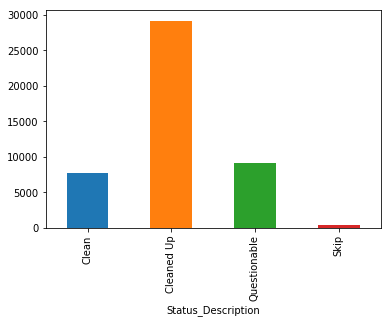

In [141]:
grouped.sum().plot(kind='bar')
#Sum calculated bar chart

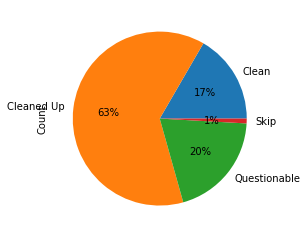

In [142]:
grouped.sum().plot(kind='pie', autopct='%1.0f%%')

#Sum calculated pie chart with percentages uses the floating point datatype

In [143]:
#Output of how long the code took to finish
final_time = int(time.time() - start_time)

print ("My program took", final_time, "seconds to run")

My program took 29 seconds to run
